In [2]:
# General tools
import matplotlib.pyplot   as plt
import numpy               as np
import reciprocalspaceship as rs
from scipy.stats import rice, foldnorm

In this notebook, we address how to express distributions of normalized structure factor amplitudes $|E|$ conditional on a reference dataset $|E_{ref}|$ with correlation parameter $r_{DW}$. This entails two steps:

1. Express the conditional mean of the $|E|$, $\langle |E| \bigl| |E_{ref}| \rangle = r_{DW}\cdot |E_{ref}|$ and conditional variance $\text{Var}\left( |E| \bigl| |E_{ref}\right)=(1-r^2)$ (centric), or $\text{Var}\left( |E| \bigl| |E_{ref}\right)=\frac{1}{2}(1-r^2)$ (acentric).
2. Convert between the Wikipedia and SciPy conventions for parametrizing the Rice and Folded Normal distributions.

In [3]:
E_ref = 0.5
r_DW  = 0.9

Missing data can be resolved by setting r_DW to 0 (and E_ref to any number), such that the priors for those data will simply be the Wilson distributions

**ACENTRIC: Wikipedia to SciPy map for Rice**
- ```b     ``` =  $\nu/\sigma$
- ```loc   ``` =  $0$
- ```scale ``` =  $\sigma$

$\nu$, the conditional mean, equals ```r_DW * |E|```

$\sigma^2$ is the conditional variance, $\frac{1}{2} (1-r_{DW}^2)$ (for acentrics only)

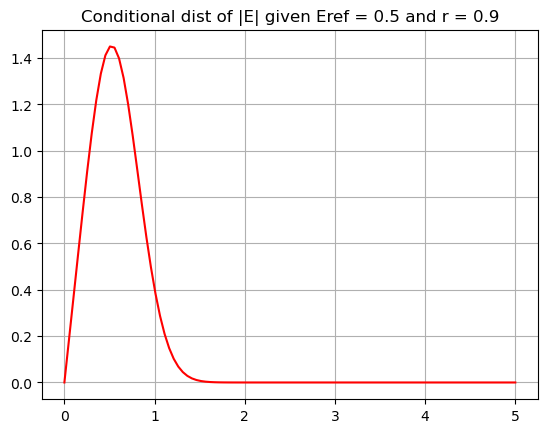

In [6]:
cond_mean   = (E_ref * r_DW)
nu          = cond_mean            # <<== KMD
cond_var_ac = 0.5*(1-r_DW**2)
sigma_ac    = np.sqrt(cond_var_ac) # <<== KMD
b           = nu/sigma_ac
scale       = sigma_ac

x=np.linspace(0,5,100)
plt.plot(x, rice.pdf(x, b=b, scale=scale),'r-')
plt.grid()
plt.title("Conditional dist of |E| given Eref = " + str(E_ref) + " and r = " + str(r_DW)); plt.show()

**CENTRIC: Wikipedia to SciPy map for Folded Normal**

- ```c    ``` = $\mu/\sigma$
- ```loc  ``` = 0
- ```scale``` = $\sigma$

$\mu$ is the conditional expectation, ```r_DW * |E|```

$\sigma^2$ is the conditional variance, $(1-r_{DW}^2)$ (for the centrics; note the missing factor $\frac{1}{2}$)


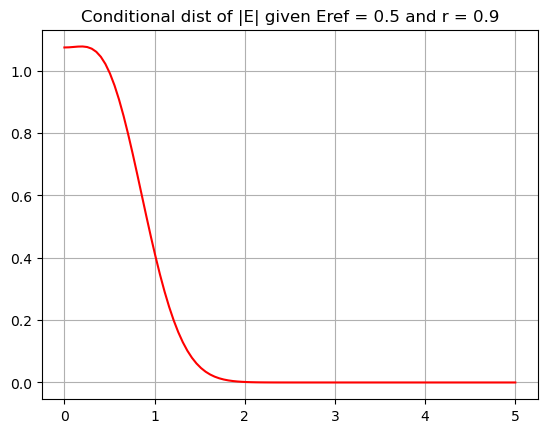

In [7]:
mu = cond_mean                 # <<== KMD
cond_var_c = (1-r_DW**2)
sigma_c = np.sqrt(cond_var_c)  # <<== KMD

c=mu/sigma_c
scale=sigma_c
x=np.linspace(0,5,100)
plt.plot(x, foldnorm.pdf(x, c=c,scale=scale),'r-')
plt.grid()
plt.title("Conditional dist of |E| given Eref = " + str(E_ref) + " and r = " + str(r_DW)); plt.show()